In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.005 seconds.
Prefix dict has been built successfully.


美國 260
進口 189
牛肉 180
瘦肉精 116
臺灣 108
美牛 88
政府 73
國人 73
意見 69
報告 67


  Terms  Freq.
0    美國    260
1    進口    189
2    牛肉    180
3   瘦肉精    116
4    臺灣    108
5    美牛     88
6    政府     73
7    國人     73
8    意見     69
9    報告     67
Text(0, 0.5, 'Frequency')


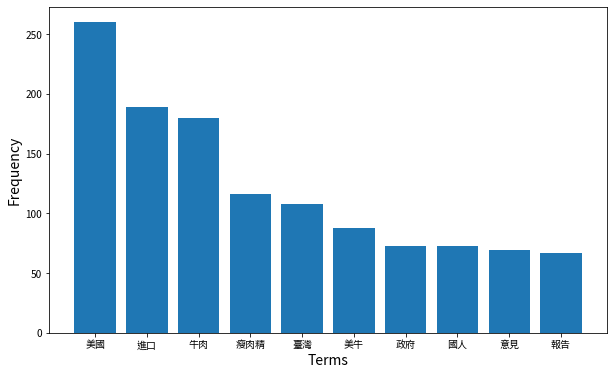

In [2]:
data01 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/proimportsspeech_ma.xlsx")
data01.fillna("",inplace=True)
lmspeech_pro = list(data01['text'])
data01.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_pro = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_pro]
for idx, speech in enumerate(lmspeech_pro):
    lmspeech_pro[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_pro)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_pro)
    bag_of_words = vec.transform(lmspeech_pro)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maproim = get_top_n_words(lmspeech_pro, 10)
for word, freq in common_words_maproim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_proim_plotly = pd.DataFrame(common_words_maproim, columns = ['ReviewText' , 'count'])
ma_proim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-imports legislators in Ma era')

maproim_cwdf = pd.DataFrame(common_words_maproim, columns=['Terms', 'Freq.'])  
print(maproim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

proim_ma_fig = plt.figure(figsize=(10,6))
proim_ma_fig = plt.bar(maproim_cwdf['Terms'], maproim_cwdf['Freq.']) 
proim_ma_fig = plt.xlabel('Terms', fontsize = 14)
proim_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#proim_ma_fig = plt.title("The 10 most frequent terms of pro-imports legislators in Ma era", fontsize = 18)

print(proim_ma_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.003 seconds.
Prefix dict has been built successfully.


美國 1100
牛肉 628
進口 600
瘦肉精 560
談判 307
衛生署 298
臺灣 291
健康 265
國人 261
行政院 253


  Terms  Freq.
0    美國   1100
1    牛肉    628
2    進口    600
3   瘦肉精    560
4    談判    307
5   衛生署    298
6    臺灣    291
7    健康    265
8    國人    261
9   行政院    253
Text(0, 0.5, 'Frequency')


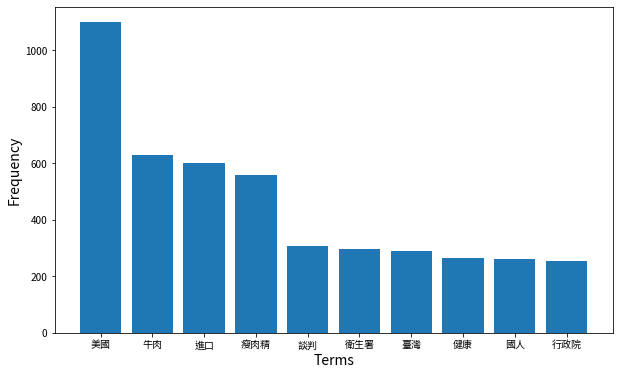

In [3]:
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiimportsspeech_ma.xlsx")
data02.fillna("",inplace=True)
lmspeech_anti = list(data02['text'])
data02.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_anti = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_anti]
for idx, speech in enumerate(lmspeech_anti):
    lmspeech_anti[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_anti)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_anti)
    bag_of_words = vec.transform(lmspeech_anti)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maantiim = get_top_n_words(lmspeech_anti, 10)
for word, freq in common_words_maantiim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_antiim_plotly = pd.DataFrame(common_words_maantiim, columns = ['ReviewText' , 'count'])
ma_antiim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of anti-imports legislators in Ma era')

maantiim_cwdf = pd.DataFrame(common_words_maantiim, columns=['Terms', 'Freq.'])  
print(maantiim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

antiim_ma_fig = plt.figure(figsize=(10,6))
antiim_ma_fig = plt.bar(maantiim_cwdf['Terms'], maantiim_cwdf['Freq.'])
antiim_ma_fig = plt.xlabel('Terms', fontsize = 14)
antiim_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of anti-imports legislators in Ma era", fontsize = 18)

print(antiim_ma_fig)

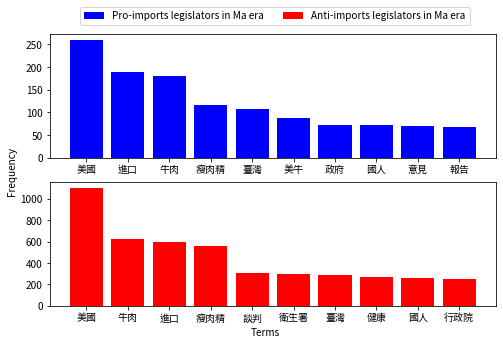

In [4]:
#Merging two figures into one
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
proim_ma_fig = plt.bar(maproim_cwdf['Terms'], maproim_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
antiim_ma_fig = plt.bar(maantiim_cwdf['Terms'], maantiim_cwdf['Freq.'], color = 'red')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.legend(handles=[proim_ma_fig, antiim_ma_fig], labels=['Pro-imports legislators in Ma era', 'Anti-imports legislators in Ma era'],
           bbox_to_anchor=[0.863, 0.97], ncol=2)
           #loc= 'upper center', ncol=2)
plt.savefig('imwordfreq_ma.png', dpi=300)

In [5]:
#from matplotlib import font_manager
#font_set = {f.name for f in font_manager.fontManager.ttflist}
#for f in font_set:
    #print(f)